In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation as Animate
from matplotlib.animation import FFMpegWriter
import pdb

def grid_transform(xi, eta, m1, m2, nozzle_xloc,nozzle_ymax,throat_xloc,throat_ymax):


    #Region 1: converging
    if xi<=1.5:
        y=eta*(m1*(xi-inlet_xloc)+inlet_ymax)
    #Region 2: diverging
    elif (xi > 1.5):
        y=eta*(m2*(xi-throat_xloc)+throat_ymax)
    #Region 3: farfield
    # elif (xi > 5) & (xi <= 25):
    #     y=eta*(m3*(xi-nozzle_xloc)+nozzle_ymax)
    else:
        print("WRONG VALUE")
    return y
    

In [2]:
xi_max = 3
eta_max = 1

xi_div = 200
eta_div = 100

xi_vec = np.linspace(0,xi_max,xi_div)
eta_vec = np.linspace(0,eta_max,eta_div)

marker = np.full((xi_div,eta_div),1)

xi_grid,eta_grid = np.meshgrid(xi_vec,eta_vec,indexing='ij')
x_grid = xi_grid

grid_trans_func = np.vectorize(grid_transform)
throat_area = 1
throat_diam = 2*np.sqrt(throat_area/np.pi)
throat_ymax = throat_diam/2
inlet_area = 5.95
nozzle_area= 5.95
inlet_diam = 2*np.sqrt(inlet_area/np.pi)
inlet_ymax = inlet_diam/2
nozzle_diam = 2*np.sqrt(nozzle_area/np.pi)
nozzle_ymax = nozzle_diam/2

throat_xloc = 1.5
inlet_xloc = 0
nozzle_xloc = 3
#farfield_xloc = 25

m1 = (throat_ymax - inlet_ymax)/(throat_xloc - inlet_xloc)
m2 = (nozzle_ymax - throat_ymax)/(nozzle_xloc - throat_xloc)
#m3 = m2*1.2

    #farfield_ymax = m3*(farfield_xloc-nozzle_xloc)+nozzle_ymax
y_grid = grid_trans_func(xi_grid,eta_grid, m1, m2, nozzle_xloc,nozzle_ymax,throat_xloc,throat_ymax)



# Plot the Discretized Domain in X, Y

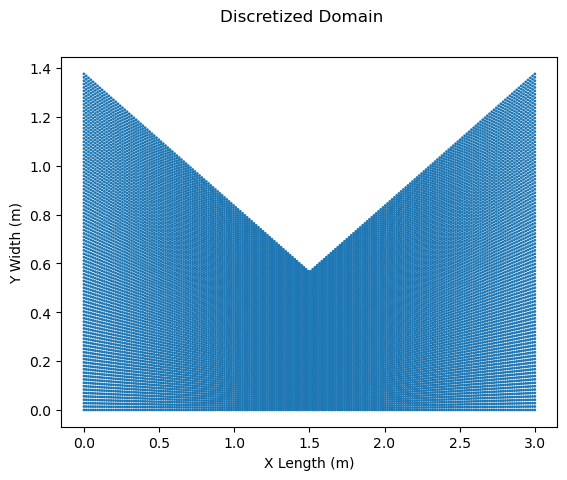

In [3]:
fig, ax = plt.subplots()
#fig.set_size_inches(6, 3)
scatter = ax.scatter(x_grid,y_grid,marker)
#ax.set_xlim([-0.1,25])
#ticks = ax.set_xticks(np.arange(0,2.2,0.2))
label = ax.set_xlabel('X Length (m)')
#ax.set_ylim([-0.1,4])
#ticks = ax.set_yticks(np.arange(0,1.2,0.2))
label = ax.set_ylabel('Y Width (m)')
text = fig.suptitle(r'Discretized Domain') 

# Plot the Discretized Domain in ${\xi}, {\eta}$

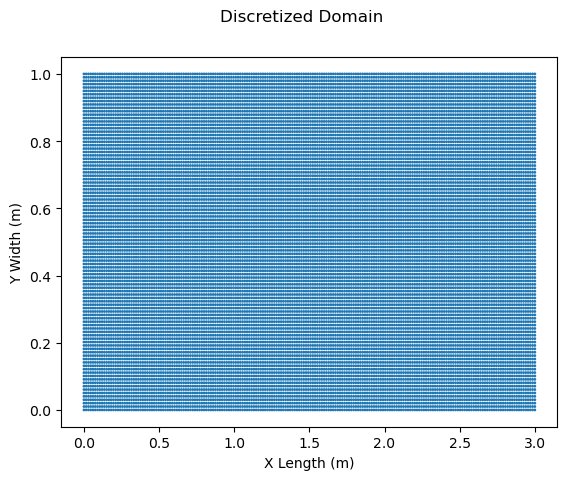

In [4]:
fig, ax = plt.subplots()
#fig.set_size_inches(6, 3)
scatter = ax.scatter(xi_grid,eta_grid,marker)
#ax.set_xlim([-0.1,25])
#ticks = ax.set_xticks(np.arange(0,2.2,0.2))
label = ax.set_xlabel('X Length (m)')
#ax.set_ylim([-0.1,2])
#ticks = ax.set_yticks(np.arange(0,1.2,0.2))
label = ax.set_ylabel('Y Width (m)')
text = fig.suptitle(r'Discretized Domain') 

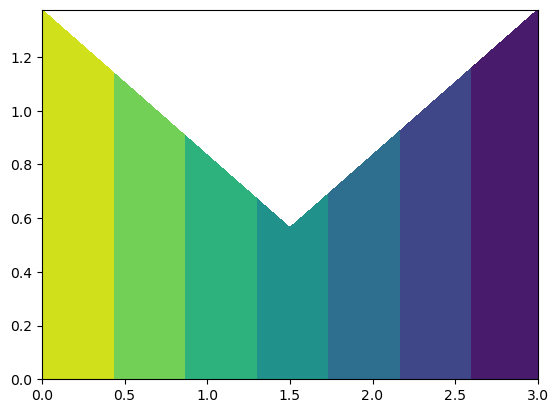

In [5]:
T = (1-0.2314*xi_grid)
plt.contourf(x_grid,y_grid,T)

In [6]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x[0:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
x[-2:10]

array([8, 9])